# K-means clustering

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [5]:
#load the dataset
df=pd.read_csv("D:/ds datatechs/datasets/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

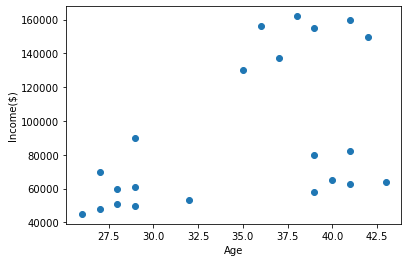

In [6]:
# create scatter plot to see the groups or clusters
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')


In [7]:
# since 3 clusters are seen, let us use K means clustering
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']]) # this gives cluster number
y_predicted # 1,0,2 --> there are 3 clusters

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
# add this cluster as another column
df['cluster']=y_predicted
df.head()


,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [9]:
# find the center coordinates of clusters
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [10]:
# separate the 3 clusters into 3 dataframes
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


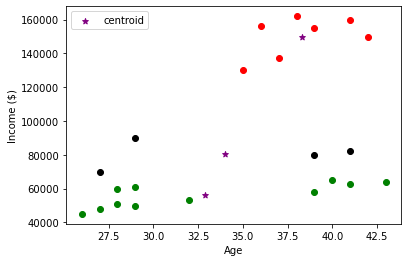

In [12]:
# scatter plot the clusters with cluster centers
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
# [:,0] --> all rows and column 0, [:,1] --> all rows and column 1
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [14]:
# the clusters are not grouped correctly. The reason is scaling is not good.
# use proper scaling. we use MinMaxScaler()
scaler = MinMaxScaler()
# fit the scale to income
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
# fit the scale to Age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()



,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [15]:
# now once again fit the K-means clustering
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [16]:
# store the y_predicted values into cluster column
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [17]:
# find cluster centers
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [18]:
# draw the plot once again
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


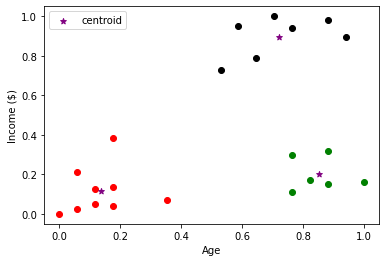

In [20]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
# [:,0] --> all rows and column 0, [:,1] --> all rows and column 1
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()


C:\Python39\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


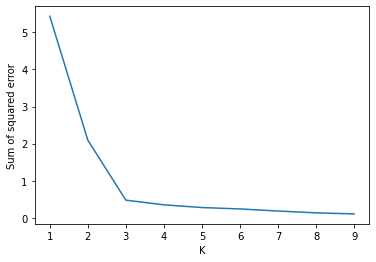

In [21]:
# elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
 km = KMeans(n_clusters=k)
 km.fit(df[['Age','Income($)']])
 sse.append(km.inertia_) # inertia_ =sum of squared distances
 
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

 as seen in above plot, k=3 at elbow. So, we have to take them as 3 groups